In [164]:
import sympy as sp
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [165]:
def origin_function(x):
    y=x[0]**2+x[1]**2-x[0]*x[1]-10*x[0]-4*x[1]+60
    return y

Text(0.5, 0, '$y$')

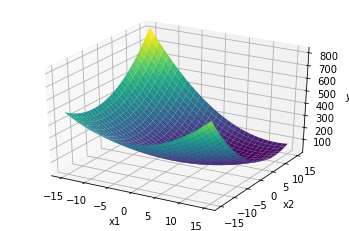

In [166]:
x1=np.arange(-15,16,1)
x2=np.arange(-15,16,1)
x1,x2=np.meshgrid(x1,x2)
y=x1**2+x2**2-x1*x2-10*x1-4*x2+60
ax1=plt.axes(projection='3d')
ax1.plot_surface(x1,x2,y,cmap='viridis')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('$y$')

In [167]:
narvs=2#变量个数
T0=100#初始温度
T=T0#初始化T之后的结果
maxgen=200#最大迭代次数
Lk=100#每个温度下的迭代次数
alpha=0.95
x_lb=[-15,-15]
x_ub=[15,15]

In [168]:
import numpy as np
x0=np.zeros(narvs)
for i in range(len(x_lb)):
    x0[i]=x_lb[i]+(x_ub[i]-x_lb[i])*np.random.uniform(0.0,1.0)
print(x0)
print(x0[0])
y0=origin_function(x0)
ax1.scatter3D(x0[0],x0[1],y0,color='r',marker='*')
plt.show()

[11.67649351 -6.6282986 ]
11.676493513609064


In [169]:
min_y=y0
MINY=np.zeros(maxgen)

In [170]:
for iter in range(1,maxgen+1):
    for i in range(1,Lk+1):
        y=np.random.rand(2)
        z=y/np.sqrt(np.sum(y**2))
        x_new=x0+z*T
        for j in range(0,narvs):
            if x_new[j]<x_lb[j]:
                r=np.random.rand(1)
                x_new[j]=r*x_lb[j]+(1-r)*x0[j]
            elif x_new[j]>x_ub[j]:
                r=np.random.rand(1)
                x_new[j]=r*x_ub[j]+(1-r)*x0[j]
        x1=x_new
        y1=origin_function(x_new)
        if y1<y0:
            x0=x1
            y0=y1
        else:
            p=sp.exp(-(y1-y0)/T)
            if np.random.rand(1)<p:
                x0=x1
                y0=y1
        if y0<min_y:
            min_y=y0
            best_x=x0
    T=alpha*T

In [171]:
print("此时的最优位置为",best_x)
print("此时的最优值为：",min_y)

此时的最优位置为 [13.14280534 13.15701994]
此时的最优值为： 48.864220843026075
